# Dataset EDA for Pre-Processing

In [1]:
import pandas as pd

Check on excessive zeros and verify original data remains uncorrupted from raw original. 


In [2]:
eda_df = pd.read_hdf(r'C:\Users\Linds\Repos\East_River\data\processed\east_river_engineered_features.h5')

In [3]:
org_scada_df = pd.read_csv(r'C:\Users\Linds\Repos\East_River\data\processed\Cleaned_SCADA_Data.csv')

In [4]:
org_weather_df = pd.read_json(r'C:\Users\Linds\Repos\East_River\data\processed\time_processed_weather.json')

In [5]:
shared_cols = eda_df.columns.intersection(org_weather_df.columns)
print("Shared columns between eda_df and org_weather_df:")
print(shared_cols.tolist())

Shared columns between eda_df and org_weather_df:
['location', 'datetime', 'temperature', 'wind_speed', 'wind_degree', 'precip', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatindex', 'windchill', 'windgust', 'feelslike', 'uv_index', 'obs_tms_lcl', 'wind_dir', 'weather_descriptions']


In [6]:
shared_cols_scada = eda_df.columns.intersection(org_scada_df.columns)
print("Shared columns between eda_df and org_scada_df:")
print(shared_cols_scada.tolist())

Shared columns between eda_df and org_scada_df:
['Unnamed: 0', 'Timestamp', 'OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW', 'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW']


In [7]:
# ensure that the Timestamp columns are in the same datetime format/timezone
org_scada_df['Timestamp'] = pd.to_datetime(org_scada_df['Timestamp']).dt.tz_localize('UTC')
eda_df['Timestamp'] = pd.to_datetime(eda_df['Timestamp'])

# merge the two dataframes on 'Timestamp' using only the shared SCADA columns from eda_df
common_cols = ['Timestamp', 'OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW',
               'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW']
merged_df = org_scada_df.merge(eda_df[common_cols], on='Timestamp', suffixes=('_scada', '_eda'))

# compare each column from SCADA with the corresponding one from eda_df
cols_to_check = ['OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW',
                 'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW']

for col in cols_to_check:
    same = merged_df[f"{col}_scada"].equals(merged_df[f"{col}_eda"])
    print(f"{col} matches:", same)

OnLine_Load_MW matches: True
Load_Control_KW matches: True
Load_Control_MW matches: True
Estimated_Online_Load_Control_MW matches: True
Control_Threshold_MW matches: True


In [8]:
cols_to_check = ['OnLine_Load_MW', 'Load_Control_KW', 'Load_Control_MW',
                 'Estimated_Online_Load_Control_MW', 'Control_Threshold_MW']

for col in cols_to_check:
    full_match = merged_df[f"{col}_scada"].equals(merged_df[f"{col}_eda"])
    print(f"{col} full match: {full_match}")

OnLine_Load_MW full match: True
Load_Control_KW full match: True
Load_Control_MW full match: True
Estimated_Online_Load_Control_MW full match: True
Control_Threshold_MW full match: True


In [9]:
eda_df = eda_df.sort_values(['location', 'datetime'])

In [10]:
eda_df.head()

,location,datetime,temperature,wind_speed,wind_degree,precip,humidity,visibility,pressure,cloudcover,...,day_of_year,day_of_year_sin,day_of_year_cos,local_date,prev_day_peak,prev_day_avg,iso_week,prev_week_peak,temp_humidity_interaction,wind_precip_interaction
0,"Aberdeen, South Dakota",2020-12-31 06:00:00+00:00,12.0,7.0,197.0,0.0,90.0,6.0,30.120,69.0,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,1080.0,0.0
225,"Aberdeen, South Dakota",2020-12-31 06:30:00+00:00,11.0,7.0,196.0,0.0,90.0,6.0,30.105,61.0,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,990.0,0.0
441,"Aberdeen, South Dakota",2020-12-31 07:00:00+00:00,10.0,7.0,195.0,0.0,90.0,6.0,30.090,53.0,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,900.0,0.0
660,"Aberdeen, South Dakota",2020-12-31 07:30:00+00:00,10.0,7.0,194.0,0.0,89.5,6.0,30.090,45.5,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,895.0,0.0
763,"Aberdeen, South Dakota",2020-12-31 08:00:00+00:00,10.0,7.0,193.0,0.0,89.0,6.0,30.090,38.0,...,366,0.017213,0.999852,2020-12-31,NaN,NaN,53,NaN,890.0,0.0


In [11]:
org_weather_df.head()

,location,datetime,temperature,wind_speed,wind_degree,precip,humidity,visibility,pressure,cloudcover,heatindex,dewpoint,windchill,windgust,feelslike,uv_index,obs_tms_lcl,wind_dir,weather_descriptions
0,"Aberdeen, South Dakota",2020-12-31 06:00:00+00:00,12.0,7.0,197.0,0.0,90.0,6.0,30.120,69.0,12.0,9.0,0.0,15.0,0.0,1.0,2020-12-31T06:00:00.000Z,SSW,Cloudy
1,"Aberdeen, South Dakota",2020-12-31 06:30:00+00:00,11.0,7.0,196.0,0.0,90.0,6.0,30.105,61.0,11.0,9.0,0.0,15.5,0.0,1.0,2020-12-31T06:00:00.000Z,SSW,Cloudy
2,"Aberdeen, South Dakota",2020-12-31 07:00:00+00:00,10.0,7.0,195.0,0.0,90.0,6.0,30.090,53.0,10.0,9.0,0.0,16.0,0.0,1.0,2020-12-31T07:00:00.000Z,SSW,Partly cloudy
3,"Aberdeen, South Dakota",2020-12-31 07:30:00+00:00,10.0,7.0,194.0,0.0,89.5,6.0,30.090,45.5,10.0,9.0,0.0,16.0,0.0,1.0,2020-12-31T07:00:00.000Z,SSW,Partly cloudy
4,"Aberdeen, South Dakota",2020-12-31 08:00:00+00:00,10.0,7.0,193.0,0.0,89.0,6.0,30.090,38.0,10.0,9.0,0.0,16.0,0.0,1.0,2020-12-31T08:00:00.000Z,SSW,Partly cloudy


Missing Values

In [12]:
print(eda_df.isnull().sum().to_string())

location                                  0
datetime                                  0
temperature                               0
wind_speed                                0
wind_degree                               0
precip                                    0
humidity                                  0
visibility                                0
pressure                                  0
cloudcover                                0
heatindex                                 0
windchill                                 0
windgust                                  0
feelslike                                 0
uv_index                                  0
obs_tms_lcl                               0
wind_dir                                  0
weather_descriptions                      0
temperature_2m                            0
precipitation                             0
snowfall                                  0
snow_depth                                0
apparent_temperature            

Zero Values

In [13]:
zero_counts = (eda_df == 0).sum().to_string()
print("Zero counts per column in eda_df:")
print(zero_counts)

Zero counts per column in eda_df:
location                                   0
datetime                                   0
temperature                            40220
wind_speed                              1203
wind_degree                             4465
precip                              11896377
humidity                                   0
visibility                            262927
pressure                                   0
cloudcover                            835753
heatindex                              40227
windchill                              64114
windgust                                 264
feelslike                              64114
uv_index                                   0
obs_tms_lcl                                0
wind_dir                                   0
weather_descriptions                       0
temperature_2m                         31494
precipitation                       11086236
snowfall                            11778408
snow_depth           

# Audit Zeros for validation

Weather

In [14]:
eda_df.groupby('hour')[['temperature', 
                          'global_tilted_irradiance', 
                          'diffuse_radiation', 
                          'direct_radiation', 
                          'wind_speed']].mean()

,temperature,global_tilted_irradiance,diffuse_radiation,direct_radiation,wind_speed
hour,,,,,
0,44.651161,0.000000,0.000000,0.000000,9.459360
1,43.909293,1.505647,0.909993,0.595654,9.402782
2,43.244540,15.826738,8.013593,7.813145,9.338513
3,42.575202,69.465340,29.385209,40.080130,9.284729
4,42.084163,177.168325,63.946465,113.221860,9.237556
5,41.768137,314.149623,99.200412,214.949211,9.191834
6,41.961314,441.552505,125.174502,316.378003,9.195439
7,42.822405,533.832018,144.312800,389.519218,9.353045
8,44.233855,583.624571,154.753089,428.871482,9.675166


Temperature, radiance and wind speed by hour appear to have normal distribution.

In [21]:
for feature in ['precip', 'precipitation', 'blended_precip']:
    zero_count = (eda_df[feature] == 0).sum()
    total = eda_df.shape[0]
    zero_pct = (zero_count / total) * 100
    print(f"{feature}: {zero_count} zeros ({zero_pct:.2f}% of total records)")

precip: 11896377 zeros (97.76% of total records)
precipitation: 11086236 zeros (91.10% of total records)
blended_precip: 10911890 zeros (89.67% of total records)


These numbers can be normal. In high-resolution data (e.g., hourly or half-hourly), it's common to see the vast majority of records without precipitation—even in places like South Dakota. However, it’s a good idea to check with local climatological data to ensure these percentages align with expectations for your dataset.

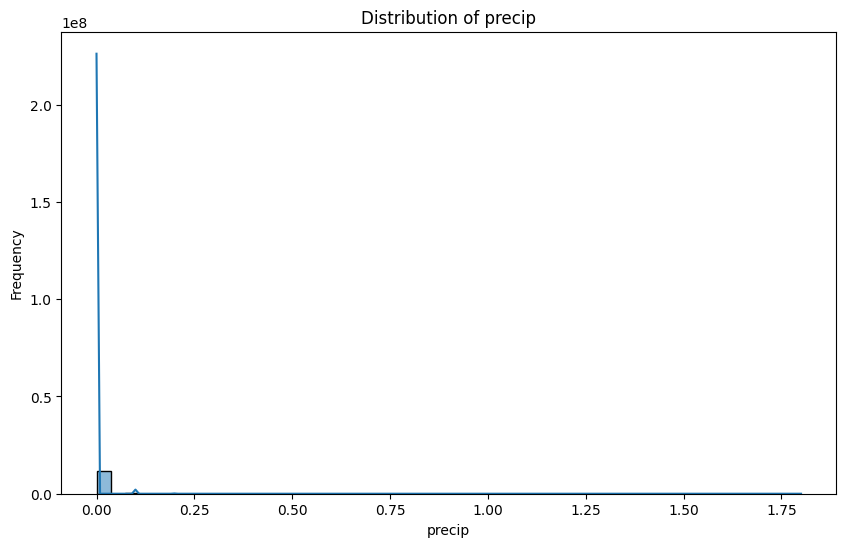

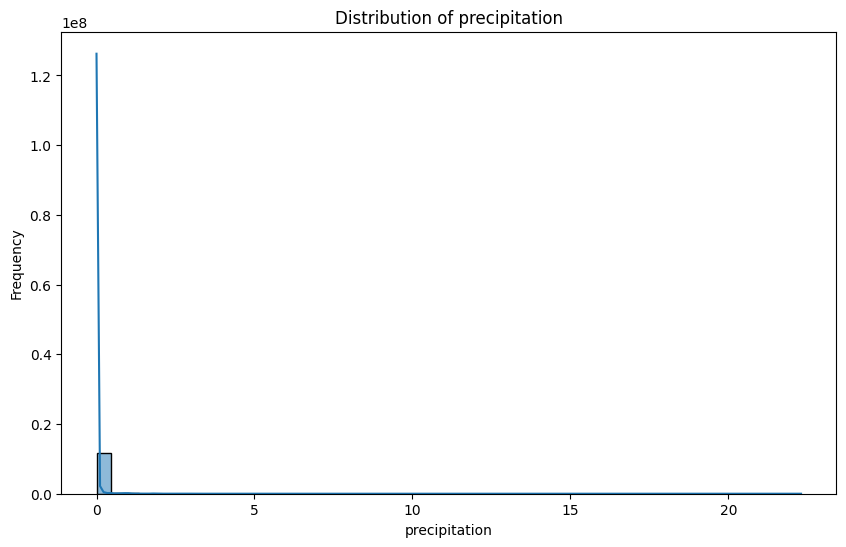

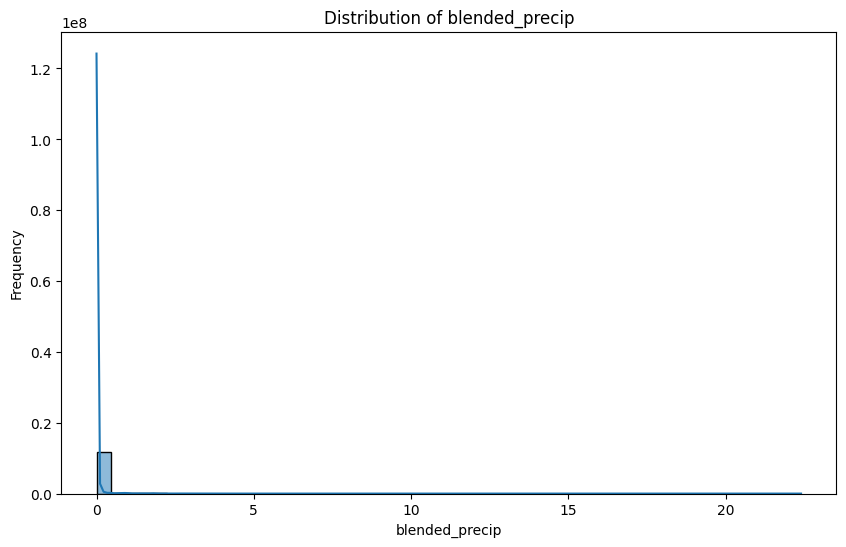

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

features_to_plot = ['precip', 'precipitation', 'blended_precip']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(eda_df[feature].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Mean Precipitation by Month:
datetime
1     0.000207
2     0.000201
3     0.001686
4     0.003176
5     0.003862
6     0.004103
7     0.003345
8     0.004113
9     0.002277
10    0.002852
11    0.001546
12    0.001138
Name: precip, dtype: float64


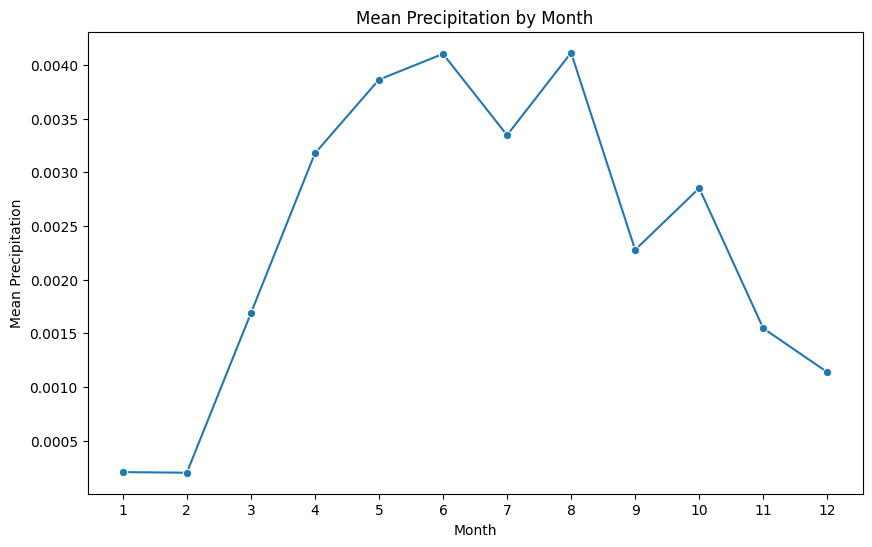

In [ ]:
# Calculate the mean precipitation for each month
precip_by_month = eda_df.groupby(eda_df['datetime'].dt.month)['precipitation'].mean()
print("Mean Precipitation by Month:")
print(precip_by_month)

# Plot the seasonal pattern
plt.figure(figsize=(10, 6))
sns.lineplot(x=precip_by_month.index, y=precip_by_month.values, marker='o')
plt.title("Mean Precipitation by Month")
plt.xlabel("Month")
plt.ylabel("Mean Precipitation")
plt.xticks(range(1, 13))
plt.show()

Create Weather Event Feature

In [18]:
# Define a wind speed threshold (adjust as needed)
wind_threshold = 20  # example threshold for high winds

def detect_weather_event(row):
    description = row.get('weather_descriptions', '')
    description_lower = description.lower() if isinstance(description, str) else ""
    # Check for storm-related keywords
    if any(keyword in description_lower for keyword in ["storm", "thunder", "tornado", "hurricane"]):
        return "storm"
    # Check for high wind speed event
    elif row.get('wind_speed', 0) >= wind_threshold:
        return "high_wind"
    else:
        return "normal"

# Add the weather event column
eda_df['weather_event'] = eda_df.apply(detect_weather_event, axis=1)
print(eda_df[['weather_descriptions', 'wind_speed', 'weather_event']].head())

    weather_descriptions  wind_speed weather_event
0                 Cloudy         7.0        normal
225               Cloudy         7.0        normal
441        Partly cloudy         7.0        normal
660        Partly cloudy         7.0        normal
763        Partly cloudy         7.0        normal


Summary statistics for temperature columns:
        temperature  apparent_temperature  temperature_2m
count  1.216869e+07          1.216869e+07    1.216869e+07
mean   4.814735e+01          6.574075e+00    9.976492e+00
std    2.374325e+01          1.488709e+01    1.281771e+01
min   -3.100000e+01         -3.980000e+01   -3.020000e+01
25%    3.000000e+01         -5.150000e+00    5.000000e-02
50%    4.900000e+01          6.050000e+00    1.020000e+01
75%    6.700000e+01          1.935000e+01    2.055000e+01
max    1.130000e+02          4.130000e+01    3.990000e+01


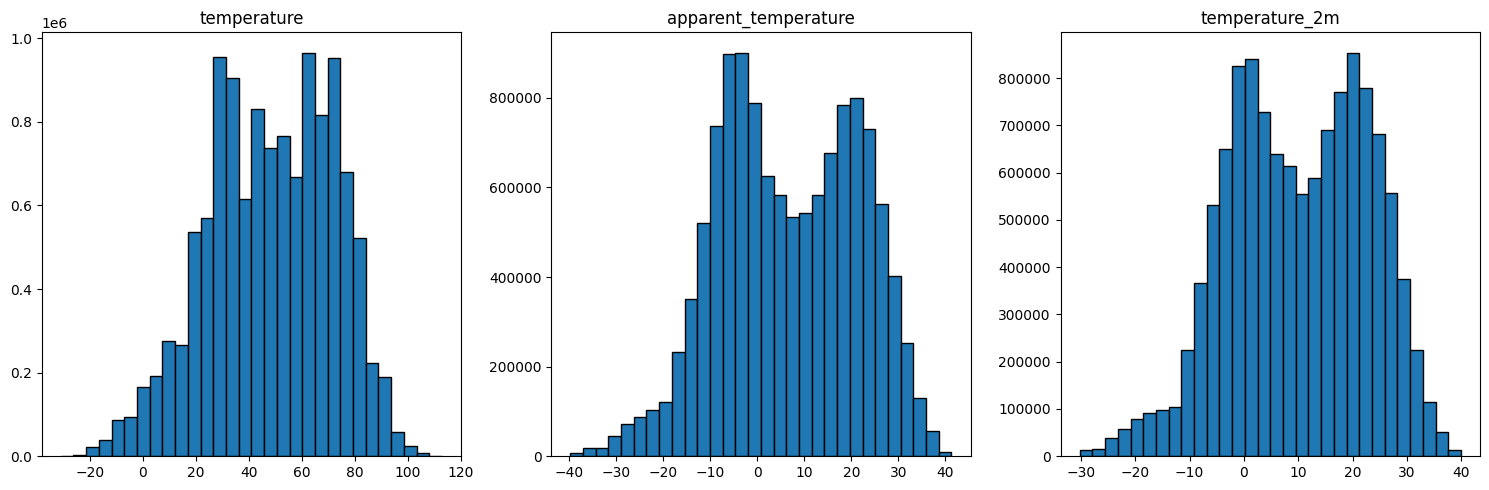

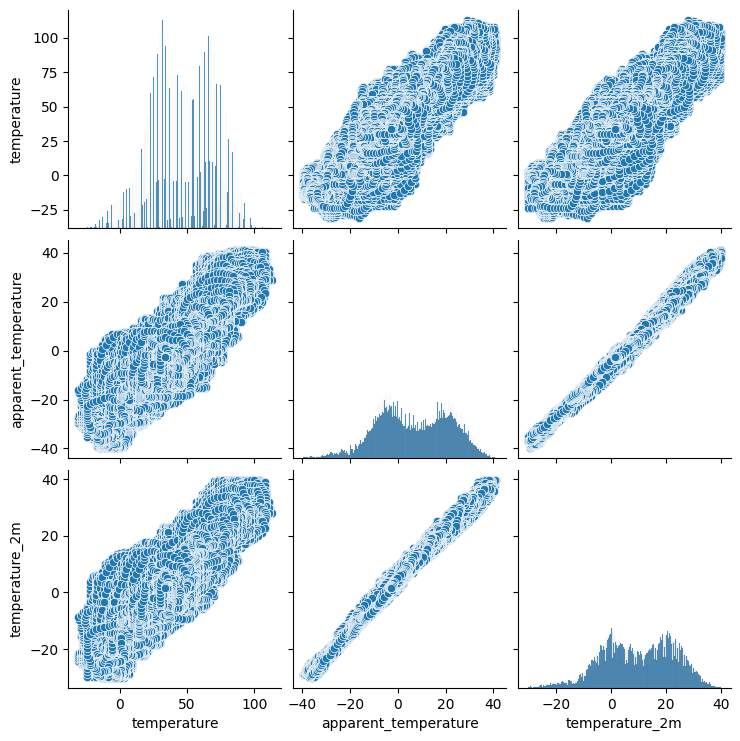

In [23]:
# Summary statistics for the suspected temperature columns
print("Summary statistics for temperature columns:")
print(eda_df[['temperature', 'apparent_temperature', 'temperature_2m']].describe())

# Plot histograms for each temperature column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for col, ax in zip(['temperature', 'apparent_temperature', 'temperature_2m'], axes):
    ax.hist(eda_df[col].dropna(), bins=30, edgecolor='k')
    ax.set_title(col)
plt.tight_layout()
plt.show()

# Plot pairwise relationships between the temperature columns
sns.pairplot(eda_df[['temperature', 'apparent_temperature', 'temperature_2m']].dropna())
plt.show()

The summary statistics and plots indicate that the three temperature measurements (e.g., temperature, apparent_temperature, temperature_2m) are quite similar in terms of range and central tendency. The histograms show that all three features roughly follow a unimodal distribution with comparable spreads, and the pairwise plots suggest a strong correlation between them. This implies that these features might be conveying similar information and could be redundant, though any slight differences might be useful for capturing calibration differences or environmental effects.

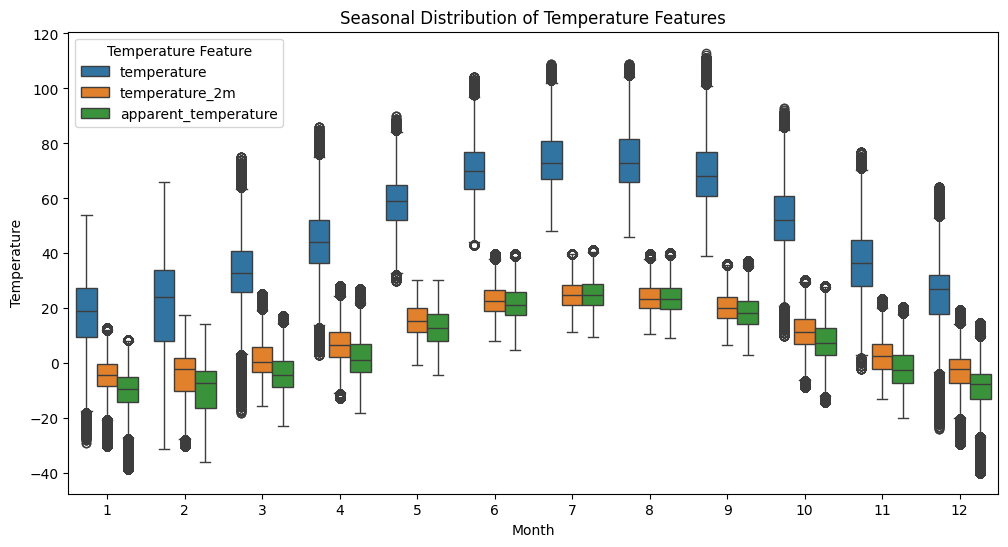

In [24]:
# Create a melted dataframe for temperature features for easier plotting
temp_features = ['temperature', 'temperature_2m', 'apparent_temperature']
temp_df = eda_df.melt(id_vars='month', value_vars=temp_features, 
                      var_name='temp_feature', value_name='value')

# Plot seasonal distribution of temperature features
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='value', hue='temp_feature', data=temp_df)
plt.title('Seasonal Distribution of Temperature Features')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend(title='Temperature Feature')
plt.show()

The box plot shows the seasonal distribution for the three temperature measures (temperature, temperature_2m, and apparent_temperature). It reveals that their medians, interquartile ranges, and overall spreads are quite similar across months, suggesting that these features are capturing similar information. Any subtle differences might indicate calibration or environmental effects, but overall the seasonal trends are consistent between them.

Based on the seasonal distributions seen in the box plots, the temperature ranges (including both high and low values) seem consistent with what we would expect for South Dakota. Winter lows in the data (with values around or below freezing) and higher summer measures align with regional climatology, though you might want to double‐check against local climatological records for complete validation.

In [25]:
eda_df['was_controlled'] = (eda_df['Load_Control_MW'] > 0).astype(int)
print(eda_df[['Load_Control_MW', 'was_controlled']].head())

     Load_Control_MW  was_controlled
0           5.077996               1
225         5.077996               1
441         5.077996               1
660         5.077996               1
763         5.077996               1


For a 24‑hr to 72‑hr forecast window you can leverage both historical load data and weather features.

LOAD FEATURES:
• OnLine_Load_MW, Load_Control_KW, Load_Control_MW, Estimated_Online_Load_Control_MW, Control_Threshold_MW
 • Lag features (load_lag_1, load_lag_2, load_lag_3) and load difference/rolling statistics (e.g. load_diff_24hr,
   load_lag_3_rolling_mean_24hrs, load_lag_3_rolling_std_24hrs) to capture recent trends.

WEATHER FEATURES:
 • Temperature measurements: temperature, temperature_2m, apparent_temperature
 • Precipitation variables: precip, precipitation, blended_precip, snowfall, snow_depth
  • Other meteorological indicators: wind_speed, wind_degree, humidity, cloudcover, pressure, uv_index,
   windchill, windgust
 • Derived features like weather_event to flag special conditions (e.g., storms, high winds)

TIME FEATURES:
 • Temporal components such as hour, day, month, day_of_week (and related cyclical transformations)

 These features together can help the model capture the influence of meteorology and historical load trends when forecasting the 24‑hr to 72‑hr window.

Audit Columns

In [26]:
# Print the dataframe summary
print("EDA DataFrame Info:")
eda_df.info()

print("\nEDA DataFrame Description:")
print(eda_df.describe(include='all'))

# Identify columns with constant values (or extremely low variance)
low_variance_cols = [col for col in eda_df.columns if eda_df[col].nunique() <= 1]
print("\nColumns with constant (or suspiciously low variance) values:")
print(low_variance_cols)

# Check for duplicate values in key columns
datetime_duplicates = eda_df['datetime'].duplicated().sum()
temperature_duplicates = eda_df['temperature'].duplicated().sum()

print(f"\nNumber of duplicate 'datetime' entries: {datetime_duplicates}")
print(f"Number of duplicate 'temperature' entries: {temperature_duplicates}")

EDA DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 12168690 entries, 0 to 12168689
Data columns (total 93 columns):
 #   Column                            Dtype                          
---  ------                            -----                          
 0   location                          object                         
 1   datetime                          datetime64[ns, UTC]            
 2   temperature                       float64                        
 3   wind_speed                        float64                        
 4   wind_degree                       float64                        
 5   precip                            float64                        
 6   humidity                          float64                        
 7   visibility                        float64                        
 8   pressure                          float64                        
 9   cloudcover                        float64                        
 10  heatindex    

In [27]:
eda_df.info()
print(eda_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 12168690 entries, 0 to 12168689
Data columns (total 93 columns):
 #   Column                            Dtype                          
---  ------                            -----                          
 0   location                          object                         
 1   datetime                          datetime64[ns, UTC]            
 2   temperature                       float64                        
 3   wind_speed                        float64                        
 4   wind_degree                       float64                        
 5   precip                            float64                        
 6   humidity                          float64                        
 7   visibility                        float64                        
 8   pressure                          float64                        
 9   cloudcover                        float64                        
 10  heatindex                        